In [1]:
!pip install pmdarima --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GEMBO/dataset.csv')
print(len(data))

173


In [6]:
data

,DATE,SALES
0,9/30/18,39
1,10/1/18,25
2,10/2/18,48
3,10/3/18,32
4,10/4/18,87
...,...,...
168,3/21/19,32
169,3/22/19,11
170,3/23/19,22
171,3/24/19,29


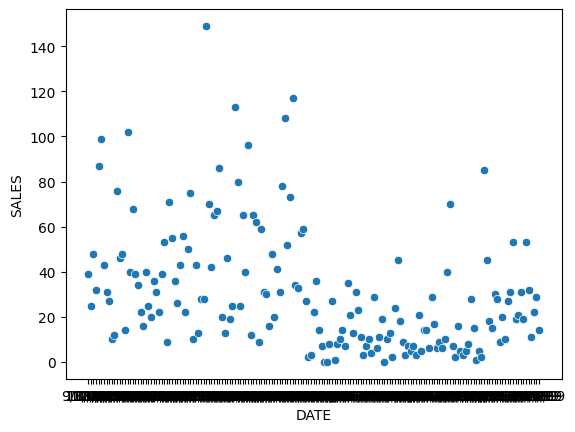

In [7]:
# Scatter Plot
sns.scatterplot(x='DATE' , y='SALES' , data=data)
plt.show()

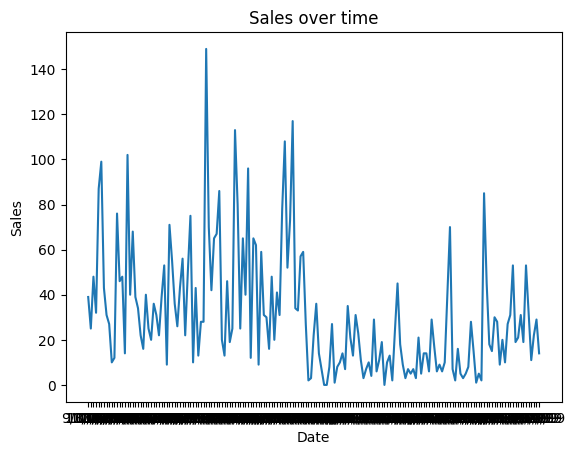

In [8]:
# Line Plot
plt.plot(data.DATE,data.SALES)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over time')
plt.show()

In this LinePlot, a declining trend of sales over time can be seen. \\
High variability initially and more stable sale values later can be seen.

Please run below cells after preprocessing

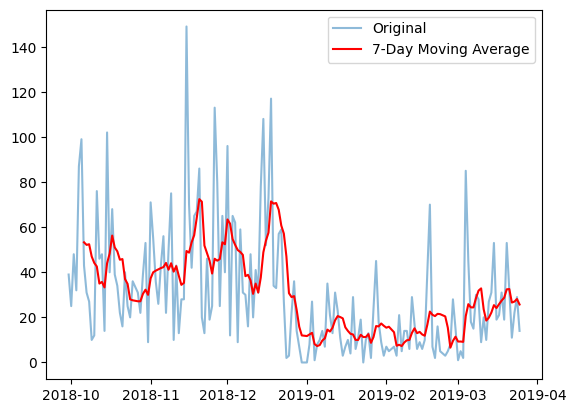

In [75]:
# Applying Rolling Average
data['Sales_MA7'] = data['SALES'].rolling(window=7).mean()
plt.plot(data['Date'], data['SALES'], alpha=0.5, label='Original')
plt.plot(data['Date'], data['Sales_MA7'], label='7-Day Moving Average', color='red')
plt.legend()
plt.show()

Shows clear Downward trend of Sales over time

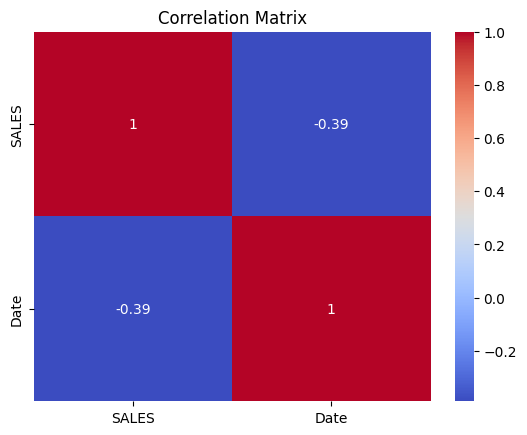

In [76]:
# Correlation Matrix
correlation = final_data.drop(['Sales_MA7','Date_ordinal','Predicted_SALES'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From this Heatmap , a correlation of -0.39 can be seen between Date and Sales , meaning with increase in time, sales have decreased but not very strongly.

## Data Preprocessing

In [10]:
# Checking for empty values
data.isna().sum()

,0
DATE,0
SALES,0
Sales_MA7,6


In [11]:
data['DATE'].dtype

dtype('O')

In [12]:
data['SALES'].dtype

dtype('int64')

In [13]:
# Converting the Object DATE to Datetime format
data['Date'] = pd.to_datetime(data['DATE'],errors = 'coerce')

<ipython-input-13-25f47ae4f037>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['DATE'],errors = 'coerce')


In [14]:
data.head()

,DATE,SALES,Sales_MA7,Date
0,9/30/18,39,NaN,2018-09-30
1,10/1/18,25,NaN,2018-10-01
2,10/2/18,48,NaN,2018-10-02
3,10/3/18,32,NaN,2018-10-03
4,10/4/18,87,NaN,2018-10-04


In [15]:
data['Date'].dtype

dtype('<M8[ns]')

In [16]:
#Just chceking if this method is helpful
data['Date_2'] = pd.to_numeric(data['DATE'], errors='coerce')
data.head()

,DATE,SALES,Sales_MA7,Date,Date_2
0,9/30/18,39,NaN,2018-09-30,NaN
1,10/1/18,25,NaN,2018-10-01,NaN
2,10/2/18,48,NaN,2018-10-02,NaN
3,10/3/18,32,NaN,2018-10-03,NaN
4,10/4/18,87,NaN,2018-10-04,NaN


In [17]:
# No , it's not!
data.drop('Date_2', axis=1)

,DATE,SALES,Sales_MA7,Date
0,9/30/18,39,NaN,2018-09-30
1,10/1/18,25,NaN,2018-10-01
2,10/2/18,48,NaN,2018-10-02
3,10/3/18,32,NaN,2018-10-03
4,10/4/18,87,NaN,2018-10-04
...,...,...,...,...
168,3/21/19,32,32.571429,2019-03-21
169,3/22/19,11,26.571429,2019-03-22
170,3/23/19,22,27.000000,2019-03-23
171,3/24/19,29,28.142857,2019-03-24


In [18]:
# We have our datetime object, we can drop original DATE Coloumn
final_data = data.drop(['DATE','Date_2'], axis=1)

In [19]:
final_data.head()

,SALES,Sales_MA7,Date
0,39,NaN,2018-09-30
1,25,NaN,2018-10-01
2,48,NaN,2018-10-02
3,32,NaN,2018-10-03
4,87,NaN,2018-10-04


<Axes: xlabel='Month', ylabel='SALES'>

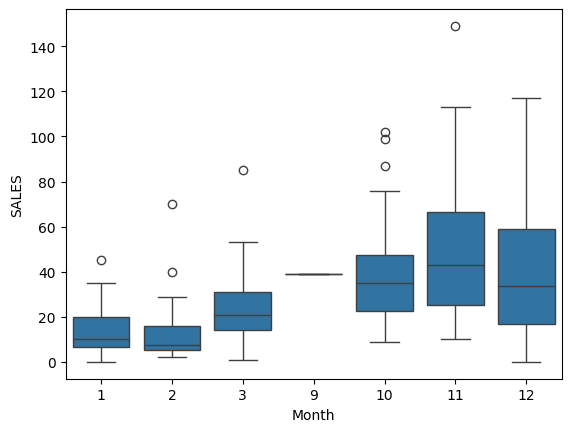

In [20]:
final_data['Month'] = final_data['Date'].dt.month
final_data['Year'] = final_data['Date'].dt.year
sns.boxplot(x='Month', y='SALES', data=final_data)


<Axes: xlabel='Year', ylabel='SALES'>

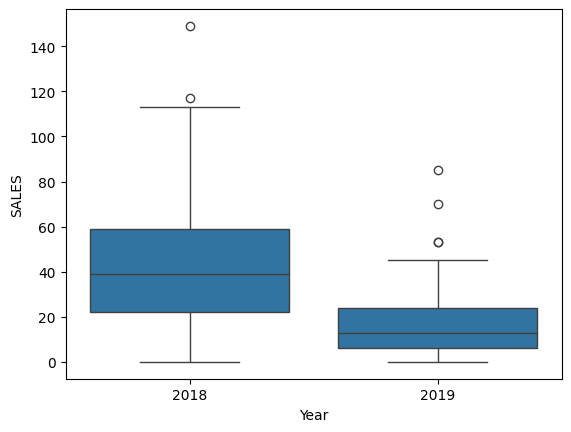

In [21]:
sns.boxplot(x='Year', y='SALES', data=final_data)

In [22]:
final_data= final_data.drop(['Month','Year'], axis=1)
final_data.head()

,SALES,Sales_MA7,Date
0,39,NaN,2018-09-30
1,25,NaN,2018-10-01
2,48,NaN,2018-10-02
3,32,NaN,2018-10-03
4,87,NaN,2018-10-04


## Linear Regression Model

In [23]:
final_data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

x = final_data[['Date_ordinal']]
y=final_data['SALES']

In [24]:
x.head()

,Date_ordinal
0,736967
1,736968
2,736969
3,736970
4,736971


In [25]:
y.head()

,SALES
0,39
1,25
2,48
3,32
4,87


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [28]:
prediction = lr_model.predict(x_test)

In [29]:
from sklearn.metrics import root_mean_squared_error, r2_score , mean_absolute_error
mse = root_mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)


print(f"Root Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 33.91041040281651
R-squared: 0.0949348506126163
Mean Absolute Error: 23.594784940389218


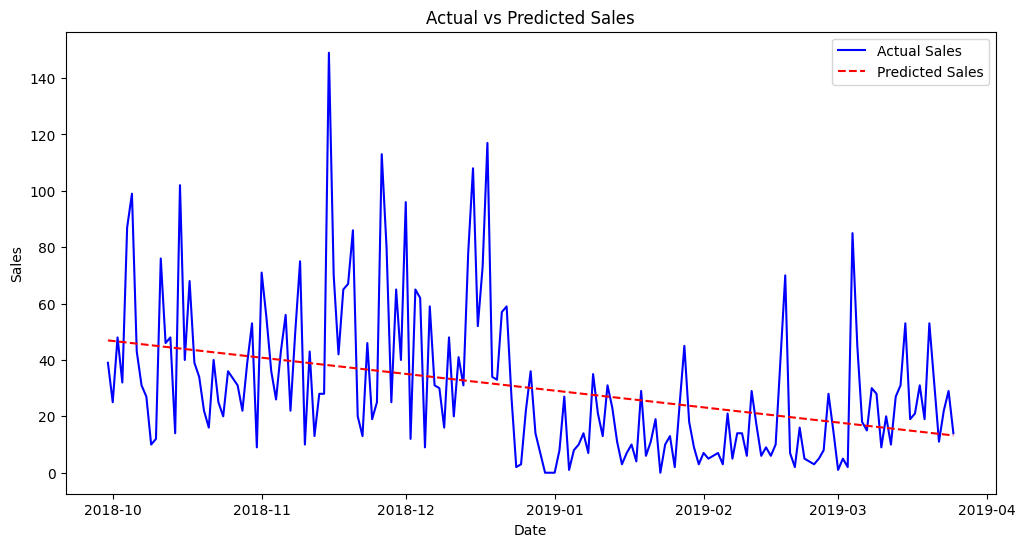

In [30]:
final_data['Predicted_SALES'] = lr_model.predict(x)

plt.figure(figsize=(12, 6))
plt.plot(final_data['Date'], final_data['SALES'], label='Actual Sales', color='blue')
plt.plot(final_data['Date'], final_data['Predicted_SALES'], label='Predicted Sales', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

NO Satisfactory Results by Linear Regression, as expected


## ARIMA Model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

data_arima = final_data.drop(['Sales_MA7','Date_ordinal','Predicted_SALES'],axis=1)
data_arima.head()

,SALES,Date
0,39,2018-09-30
1,25,2018-10-01
2,48,2018-10-02
3,32,2018-10-03
4,87,2018-10-04


In [32]:
data_arima.set_index('Date', inplace=True)
data_arima.head()

,SALES
Date,
2018-09-30,39
2018-10-01,25
2018-10-02,48
2018-10-03,32
2018-10-04,87


In [72]:
model = ARIMA(data_arima['SALES'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SALES   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -791.076
Date:                Thu, 22 May 2025   AIC                           1588.152
Time:                        17:17:51   BIC                           1597.595
Sample:                             0   HQIC                          1591.983
                                - 173                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1377      0.090      1.533      0.125      -0.038       0.314
ma.L1         -0.9020      0.051    -17.810      0.000      -1.001      -0.803
sigma2       573.8524     41.127     13.953      0.000     493.245     654.460
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               132.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# steps =input('What should be the number of steps ahead')
# steps=int(n_steps)
steps=15
forecast = model_fit.forecast(steps=steps)
print(forecast)

173    22.883520
174    24.106562
175    24.274945
176    24.298128
177    24.301319
178    24.301759
179    24.301819
180    24.301827
181    24.301829
182    24.301829
183    24.301829
184    24.301829
185    24.301829
186    24.301829
187    24.301829
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
last_date=data_arima.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=steps, freq='D') # Freq in days, for Months= MS
forecast_series = pd.Series(forecast.values, index=forecast_index)
print(forecast_series)

2019-03-26    24.710442
2019-03-27    24.710442
2019-03-28    24.710442
2019-03-29    24.710442
2019-03-30    24.710442
2019-03-31    24.710442
2019-04-01    24.710442
2019-04-02    24.710442
2019-04-03    24.710442
2019-04-04    24.710442
2019-04-05    24.710442
2019-04-06    24.710442
2019-04-07    24.710442
2019-04-08    24.710442
2019-04-09    24.710442
Freq: D, dtype: float64


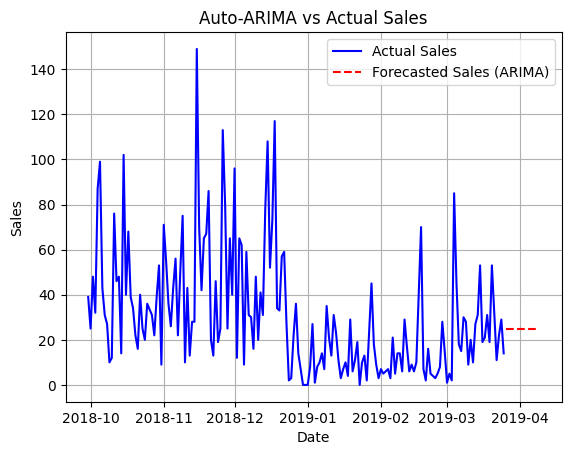

In [67]:
plt.plot(data_arima.index, data_arima['SALES'], label='Actual Sales', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales (ARIMA)', color='red', linestyle='--')
plt.title('Auto-ARIMA vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

The Model is not giving satisfactory results either, we need to experiment with the values of "p, d, q".

We are using auto arima from pmd arima to automatically generate best values of p,d,q and hence getting the best ARIMA model

In [ ]:
from pmdarima import auto_arima

model = auto_arima(data_arima['SALES'], seasonal=False, trace=True)
model.fit(data_arima['SALES'])

# steps =int(input('What should be the number of steps ahead : '))
steps=150
forecast = model.predict(n_periods=steps)

# We have the forecast now we just have to merge it with future dates
last_date=data_arima.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=steps, freq='D') # Freq in days, for Months= MS
forecast_series = pd.Series(forecast.values, index=forecast_index)

print(forecast_series)

plt.plot(data_arima.index, data_arima['SALES'], label='Actual Sales', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Sales (ARIMA)', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

## LSTM Method

In [77]:
pip install tensorflow keras

In [78]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
data_lstm = final_data['SALES'].values.reshape(-1, 1)
data_lstm

array([[ 39],
       [ 25],
       [ 48],
       [ 32],
       [ 87],
       [ 99],
       [ 43],
       [ 31],
       [ 27],
       [ 10],
       [ 12],
       [ 76],
       [ 46],
       [ 48],
       [ 14],
       [102],
       [ 40],
       [ 68],
       [ 39],
       [ 34],
       [ 22],
       [ 16],
       [ 40],
       [ 25],
       [ 20],
       [ 36],
       [ 31],
       [ 22],
       [ 39],
       [ 53],
       [  9],
       [ 71],
       [ 55],
       [ 36],
       [ 26],
       [ 43],
       [ 56],
       [ 22],
       [ 50],
       [ 75],
       [ 10],
       [ 43],
       [ 13],
       [ 28],
       [ 28],
       [149],
       [ 70],
       [ 42],
       [ 65],
       [ 67],
       [ 86],
       [ 20],
       [ 13],
       [ 46],
       [ 19],
       [ 25],
       [113],
       [ 80],
       [ 25],
       [ 65],
       [ 40],
       [ 96],
       [ 12],
       [ 65],
       [ 62],
       [  9],
       [ 59],
       [ 31],
       [ 30],
       [ 16],
       [ 48],
      

In [80]:
scaler = MinMaxScaler()
scaled_data_lstm = scaler.fit_transform(data_lstm)

In [81]:
lookback = 15  # use past 60 days
n_days = 15    # forecast next 15 days

In [82]:
X, y = [], []
for i in range(len(scaled_data_lstm) - lookback):
    X.append(scaled_data_lstm[i:i+lookback])
    y.append(scaled_data_lstm[i+lookback])
X, y = np.array(X), np.array(y)
X_train, y_train = X, y

In [83]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(lookback, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [84]:
last_sequence = scaled_data_lstm[-lookback:]  # last 30 days
forecast = []

for _ in range(n_days):
    input_seq = last_sequence.reshape(1, lookback, 1)
    next_val = model.predict(input_seq, verbose=0)[0][0]
    forecast.append(next_val)
    last_sequence = np.append(last_sequence, [[next_val]], axis=0)[-lookback:]

# Inverse transform forecast
forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
future_dates = pd.date_range(start=data_arima.index[-1] + pd.Timedelta(days=1), periods=n_days)

In [85]:
print(forecast_actual)

[[26.54489 ]
 [26.940298]
 [27.48323 ]
 [27.820858]
 [28.144085]
 [28.003344]
 [28.415688]
 [28.823284]
 [29.119226]
 [29.616337]
 [29.485008]
 [29.722916]
 [30.318514]
 [30.72929 ]
 [31.014671]]


In [86]:
forecast_actual_1D = pd.Series([item[0] for item in forecast_actual])
print(forecast_actual_1D)

0     26.544889
1     26.940298
2     27.483231
3     27.820858
4     28.144085
5     28.003344
6     28.415688
7     28.823284
8     29.119226
9     29.616337
10    29.485008
11    29.722916
12    30.318514
13    30.729290
14    31.014671
dtype: float32


In [87]:
print(pd.Series(forecast_actual_1D.values, index=future_dates))

2019-03-26    26.544889
2019-03-27    26.940298
2019-03-28    27.483231
2019-03-29    27.820858
2019-03-30    28.144085
2019-03-31    28.003344
2019-04-01    28.415688
2019-04-02    28.823284
2019-04-03    29.119226
2019-04-04    29.616337
2019-04-05    29.485008
2019-04-06    29.722916
2019-04-07    30.318514
2019-04-08    30.729290
2019-04-09    31.014671
Freq: D, dtype: float32


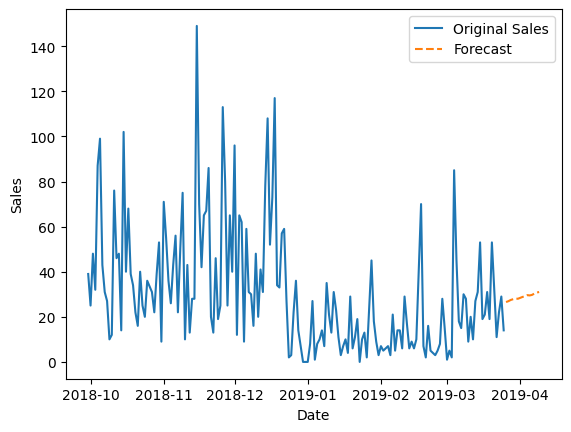

In [88]:

plt.plot(data_arima.index, data_arima['SALES'], label='Original Sales')
plt.plot(future_dates, forecast_actual, label='Forecast', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

By Far, LSTM has shown the most accurate results

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2019-03-26    23.413424
2019-03-27    23.212954
2019-03-28    22.993685
2019-03-29    22.770359
2019-03-30    22.520208
2019-03-31    22.298363
2019-04-01    22.100660
2019-04-02    21.901918
2019-04-03    21.711044
2019-04-04    21.406128
2019-04-05    21.177166
2019-04-06    21.002182
2019-04-07    20.833105
2019-04-08    20.642530
2019-04-09    20.463007
Freq: D, dtype: float32


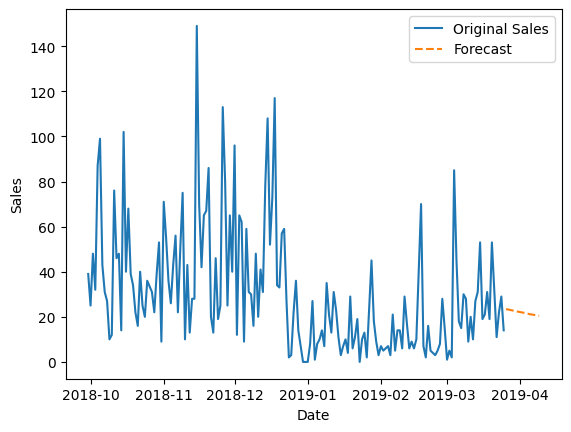

In [89]:
# Trying out different types of model here
lookback = 30  # use past 30 days
n_days = 15    # forecast next 15 days

X, y = [], []
for i in range(len(scaled_data_lstm) - lookback):
    X.append(scaled_data_lstm[i:i+lookback])
    y.append(scaled_data_lstm[i+lookback])
X, y = np.array(X), np.array(y)
X_train, y_train = X, y

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(lookback, 1)),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[early_stop])

last_sequence = scaled_data_lstm[-lookback:]  # last 30 days
forecast = []

for _ in range(n_days):
    input_seq = last_sequence.reshape(1, lookback, 1)
    next_val = model.predict(input_seq, verbose=0)[0][0]
    forecast.append(next_val)
    last_sequence = np.append(last_sequence, [[next_val]], axis=0)[-lookback:]

# Inverse transform forecast
forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
future_dates = pd.date_range(start=data_arima.index[-1] + pd.Timedelta(days=1), periods=n_days)

forecast_actual_1D = pd.Series([item[0] for item in forecast_actual])
print(pd.Series(forecast_actual_1D.values, index=future_dates))

plt.plot(data_arima.index, data_arima['SALES'], label='Original Sales')
plt.plot(future_dates, forecast_actual, label='Forecast', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

This is most accurately predicting model using LSTM

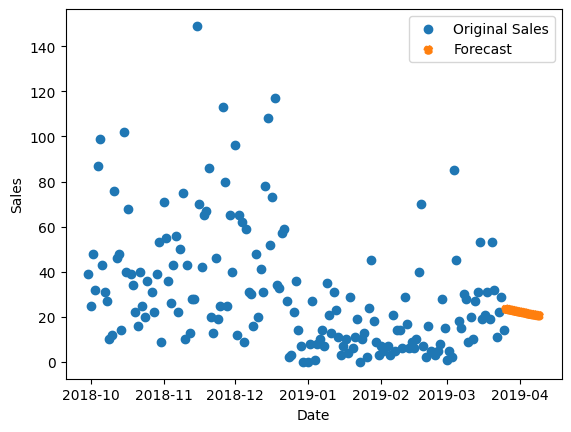

In [90]:
plt.scatter(data_arima.index, data_arima['SALES'], label='Original Sales')
plt.scatter(future_dates, forecast_actual, label='Forecast', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

Comparing it with the rolling Avg trend of the original data

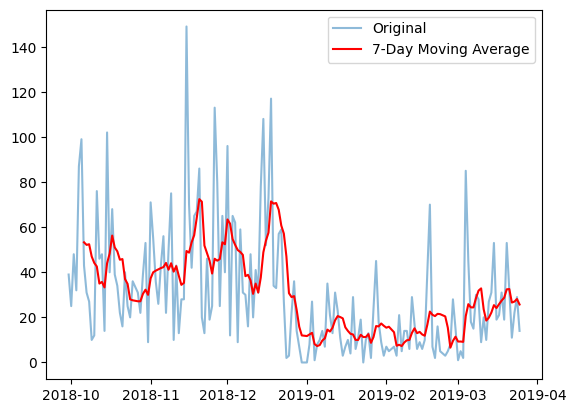